In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import math
import calendar

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
bank_data = pd.read_csv('bank-additional-full.csv', index_col=None, delimiter=';')


In [3]:
bank_data['target'] = bank_data['y'].map({'yes': 1, 'no':0})
bank_data.drop(['y'], axis=1, inplace=True)

In [4]:
bank_data = bank_data.rename(columns = {
    'emp.var.rate': "employment_variation_rate",
    'cons.price.idx': "consumer_price_index",
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': "euribor_3_month_rate",
    'nr.employed': "number_of_employees"   
})

In [5]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  duration                   41188 non-null  int64  
 11  campaign                   41188 non-null  int64  
 12  pdays                      41188 non-null  int64  
 13  previous                   41188 non-null  int

In [7]:
bank_data.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact                      0
month                        0
day_of_week                  0
duration                     0
campaign                     0
pdays                        0
previous                     0
poutcome                     0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor_3_month_rate         0
number_of_employees          0
target                       0
dtype: int64

In [8]:
bank_data.dtypes

age                            int64
job                           object
marital                       object
education                     object
default                       object
housing                       object
loan                          object
contact                       object
month                         object
day_of_week                   object
duration                       int64
campaign                       int64
pdays                          int64
previous                       int64
poutcome                      object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3_month_rate         float64
number_of_employees          float64
target                         int64
dtype: object

### There are no missing values in this dataset

### There are 12 duplicates so dropped those rows

In [9]:
print(bank_data.shape)
data = bank_data

(41188, 21)


In [10]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [11]:
data_dup.shape


(12, 21)

In [12]:
data = data.drop_duplicates()
data.shape
bank_data = data

In [13]:
print(bank_data.shape)

(41176, 21)


In [14]:
bank_data['is_new']= bank_data['previous'].apply(lambda x: 'new' if x==0 else 'old')


## Visualize the Target column

In [15]:
n = len(bank_data)
n_not_subscribed = sum(bank_data['target'])
n_subscribe = n - n_not_subscribed

print('Dataset contains %d records' % (n))
print('Number of customers who subscribed: %d (%0.2f%%)' % (n_subscribe, n_subscribe*100/n))
print('Number of customers who have not subscribed: %d (%0.2f%%)' % (n_not_subscribed, n_not_subscribed*100/n))


Dataset contains 41176 records
Number of customers who subscribed: 36537 (88.73%)
Number of customers who have not subscribed: 4639 (11.27%)


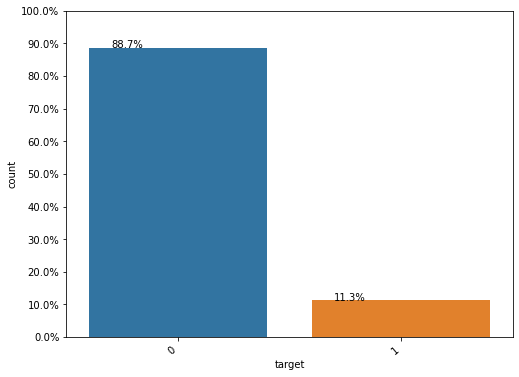

In [16]:
# Graphics in SVG format are more sharp and legible
# %config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(8,6))
Y = bank_data["target"]
total = len(Y)*1.
ax=sns.countplot(x="target", data=bank_data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


There are 5289 which is 11.7% of customers have subscribed to the term deposit and around 39,922 which is 88.3% have not subscribed to the term deposit.

In [17]:
def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="target")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()


In [18]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

# Categorical Values

## Education 

In [19]:
bank_data['education_mod']=bank_data['education'].map({'university.degree':'university_graduate','high.school':'school_passout','basic.9y':'school_dropout','basic.4y':'school_dropout','basic.6y':'school_dropout','professional.course':'advanced_degree','unknown':'unknown','illiterate':'unknown'})

bank_data = bank_data.drop(['education'], axis=1)

bank_data.head()


,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target,is_new,education_mod
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_dropout
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_dropout
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'school_dropout'),
  Text(1, 0, 'school_passout'),
  Text(2, 0, 'advanced_degree'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'university_graduate')])

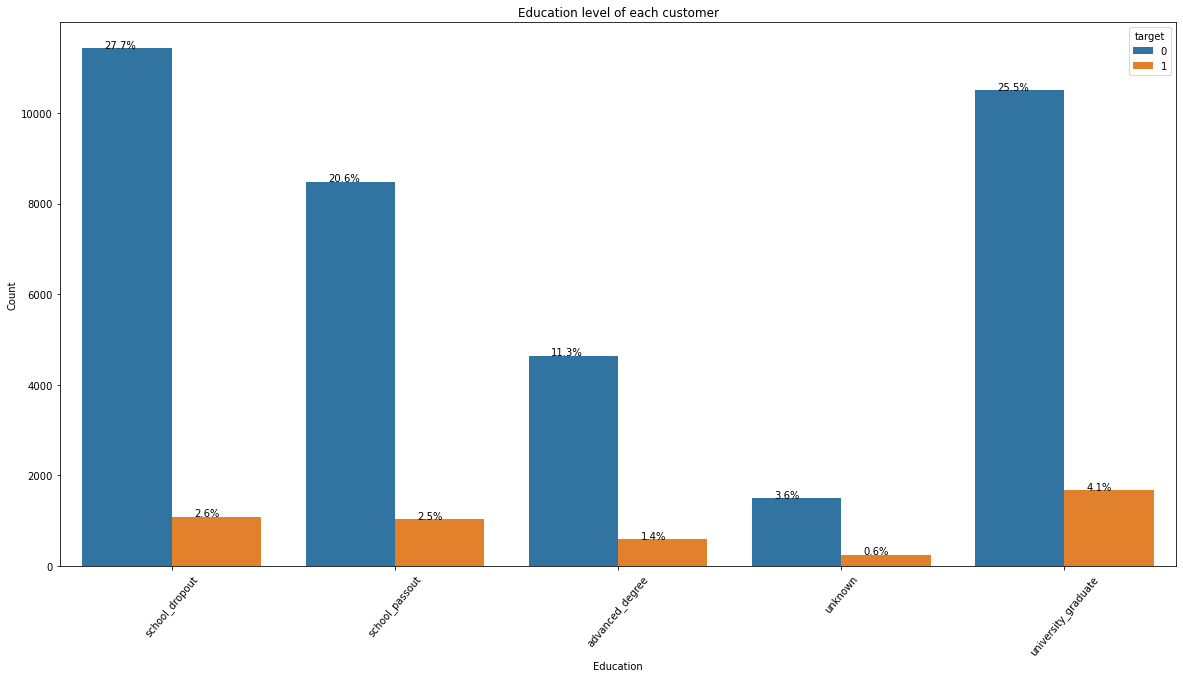

In [20]:
countplot_withY("education_mod", bank_data)
plt.title('Education level of each customer')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=50)

25% of the customers who have university degree have subscribed to the term deposit and only 4.1% have not subscribes to the term deposit. 

Higher education level may lead to greater financial literacy and understanding of the benefits of saving and investing. This knowledge may make individuals more likely to consider a term deposit as a way to save and earn interest on their money. 

## Last Contact Month Of Year

In [21]:
months_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
bank_data['month'] = pd.Categorical(bank_data['month'], 
                     categories=months_order, ordered=True)


In [22]:
monthly_subscribers = bank_data.groupby('month')['target'].sum()
monthly_subscribers

month
jan      0
feb      0
mar    276
apr    539
may    886
jun    559
jul    648
aug    655
sep    256
oct    315
nov    416
dec     89
Name: target, dtype: int64

In [23]:
monthly_subscribers.idxmax()

'may'

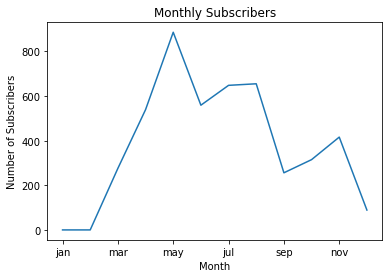

In [24]:
monthly_subscribers.plot(kind='line')

plt.title('Monthly Subscribers')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.show()


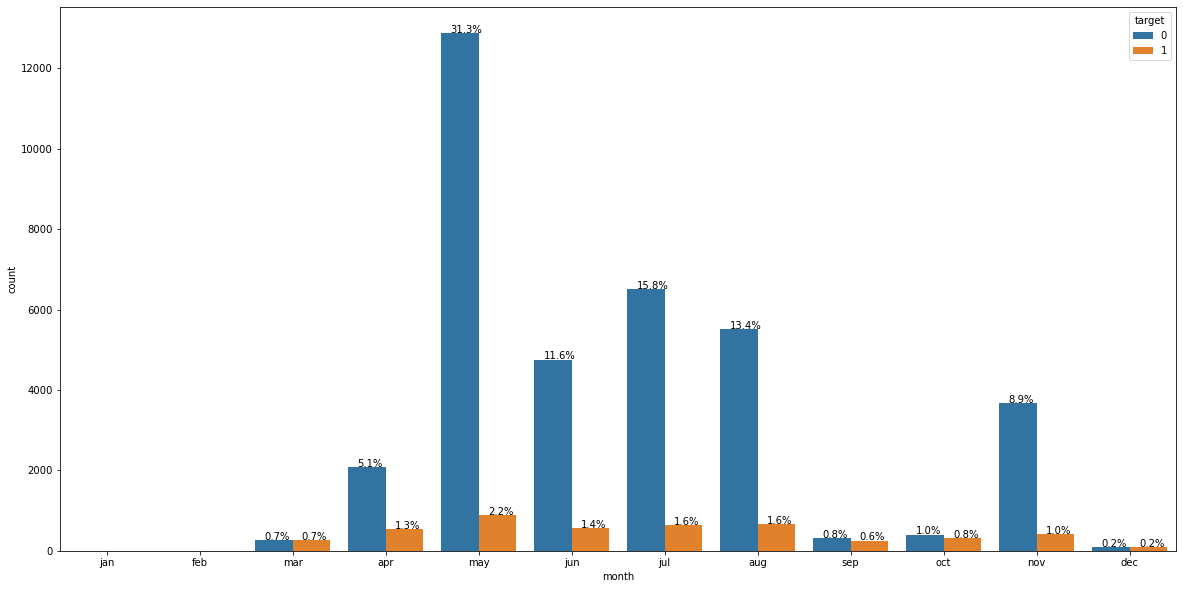

In [25]:
countplot_withY("month", bank_data)

highest frequency of customers contact to subscribe to the term deposit.

May has highest frequency of customers contact to subscribe to the term deposit. This information can be useful for identifying patterns in customer behavior and for optimizing marketing and outreach efforts to improve subscription rates. 

## Last Contact Day Of The Week

In [26]:
days_order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
bank_data['day_of_week'] = pd.Categorical(bank_data['day_of_week'], 
                     categories=days_order, ordered=True)


In [27]:
day_subscribers = bank_data.groupby('day_of_week')['target'].sum()
day_subscribers

day_of_week
mon     847
tue     953
wed     949
thu    1044
fri     846
sat       0
sun       0
Name: target, dtype: int64

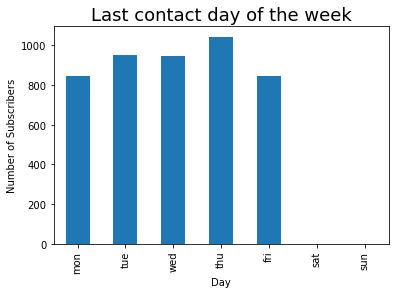

In [28]:
day_subscribers.plot(kind='bar')
plt.title('Last contact day of the week', fontsize=18)
plt.xlabel('Day')
plt.ylabel('Number of Subscribers')
plt.show()

The day of the week is not relevant as we have the same amount of data for all the data of the week

## Has Housing Loan

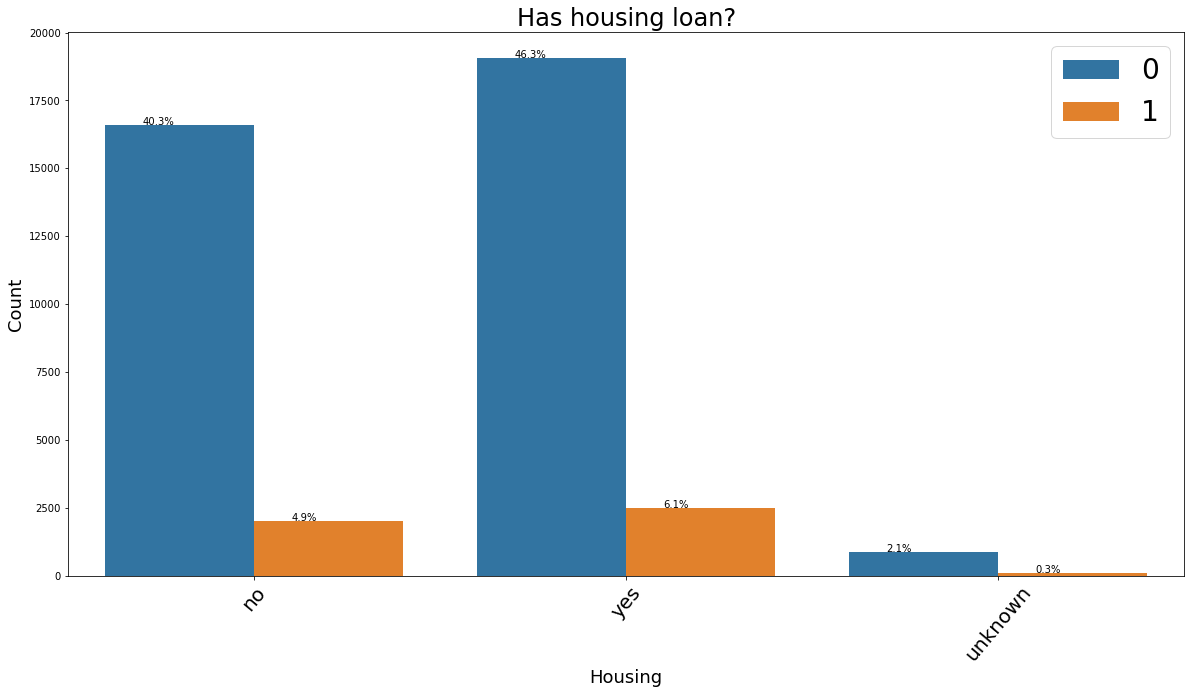

In [29]:
countplot_withY("housing", bank_data)

plt.title('Has housing loan?', fontsize=24)
plt.xlabel('Housing', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()


About 18,000 customers who have been contact does not have housing loans and about 22,000 customers have housing loans and the rest is unknown.

## Types of Job

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


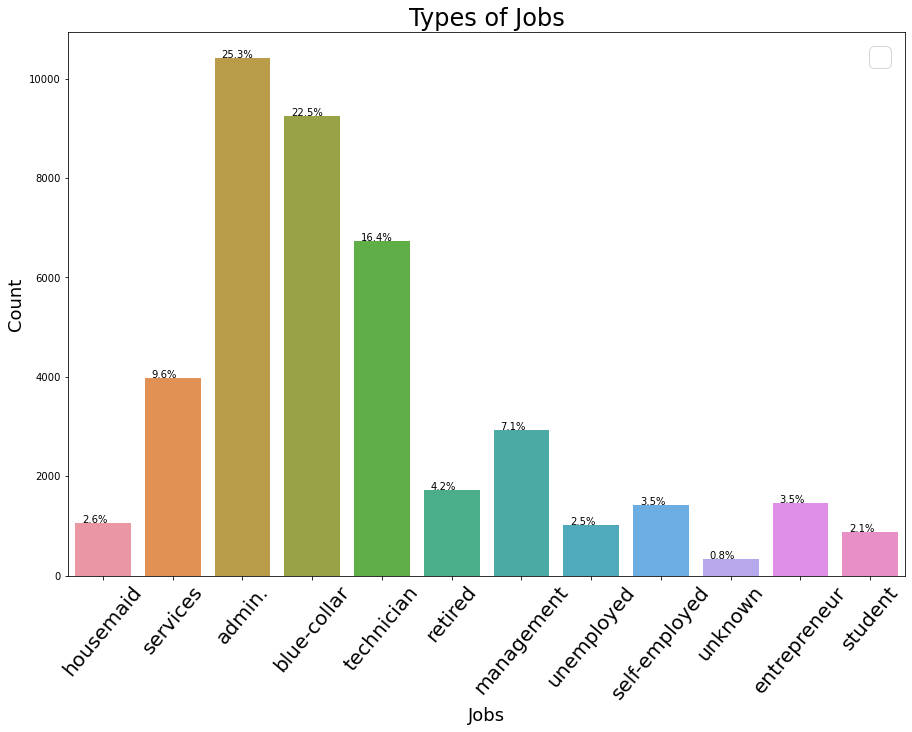

In [30]:
countplot("job", bank_data)

plt.title('Types of Jobs', fontsize=24)
plt.xlabel('Jobs', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()

Most of the customers have jobs as Admin, Blue-Collar, and Technician. 

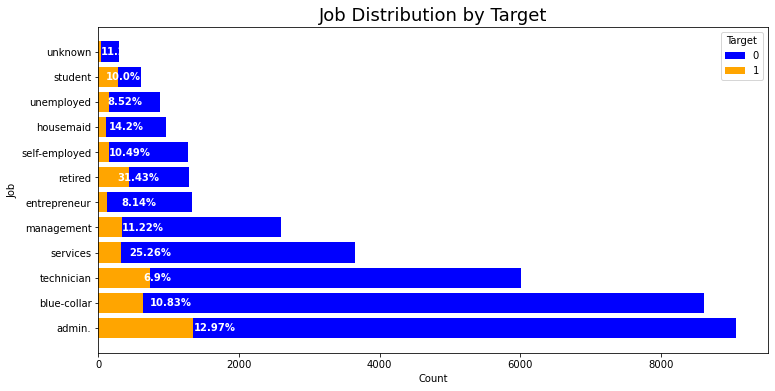

In [31]:
job_counts = bank_data['job'].value_counts()
job_0_counts = bank_data.loc[bank_data['target'] == 0]['job'].value_counts()
job_1_counts = bank_data.loc[bank_data['target'] == 1]['job'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(job_0_counts.index, job_0_counts.values, label='0', color='blue')
ax.barh(job_1_counts.index, job_1_counts.values, label='1', color='orange')

# for i, v in enumerate(job_0_counts.values):
#     ax.text(v, i, str(round((v/job_counts[job_0_counts.index[i]])*100,2))+'%', fontweight='bold', color='white', ha='right', va = 'center')
    
for i, v in enumerate(job_1_counts.values):
    ax.text(v, i, str(round((v/job_counts[job_1_counts.index[i]])*100,2))+'%', fontweight='bold', color='white', ha='left', va='center')

ax.legend(title='Target')
ax.set_xlabel('Count')
ax.set_ylabel('Job')
ax.set_title('Job Distribution by Target', fontsize=18)
plt.show()


Customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the hihest when it comes to not subscribing. This could be because there are more customers working as admin than any other profession. 

## Marital Status

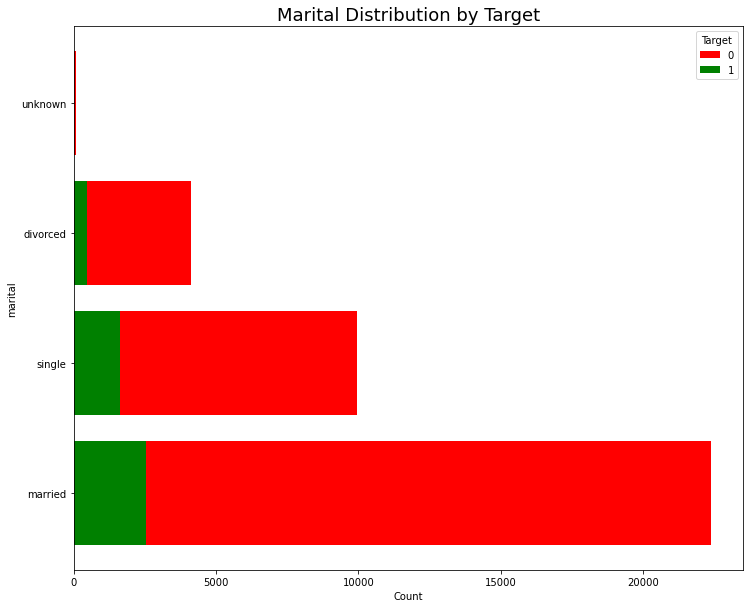

In [32]:
marital_counts = bank_data['marital'].value_counts()
marital_0_counts = bank_data.loc[bank_data['target'] == 0]['marital'].value_counts()
marital_1_counts = bank_data.loc[bank_data['target'] == 1]['marital'].value_counts()

fig, ax = plt.subplots(figsize=(12,10))
#ax.barh(job_counts.index, job_counts.values, label='Total')
ax.barh(marital_0_counts.index, marital_0_counts.values, label='0', color='red')
ax.barh(marital_1_counts.index, marital_1_counts.values, label='1', color='green')

#for i, v in enumerate(job_counts.values):
 #   ax.text(v, i, str(round((v/df.shape[0])*100,2))+'%', fontweight='bold')

ax.legend(title='Target')
ax.set_xlabel('Count')
ax.set_ylabel('marital')
ax.set_title('Marital Distribution by Target', fontsize=18)
plt.show()

Married customers have the highest rate of subscribing a term deposit 

## Default - not included

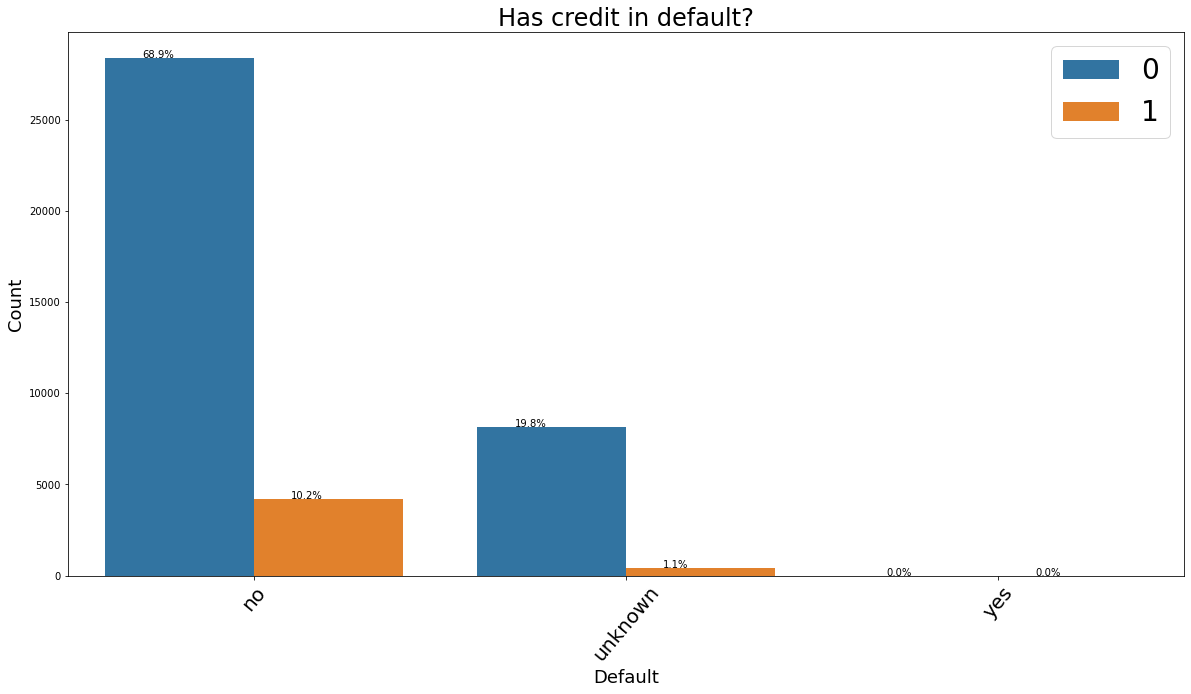

In [33]:
countplot_withY("default", bank_data)

plt.title('Has credit in default?', fontsize=24)
plt.xlabel('Default', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()

There is no customer who has credit in default. Majority of customers don't have, and the rest of the customers is unknown.

# Continuous Variables

## Duration 

last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_68034/1767529198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["duration"])


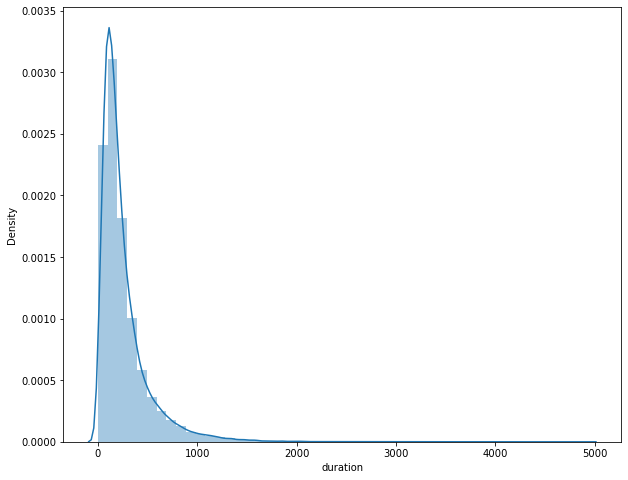

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"])
plt.show()


The distribution plot shows that most values are very low and very few have high values.

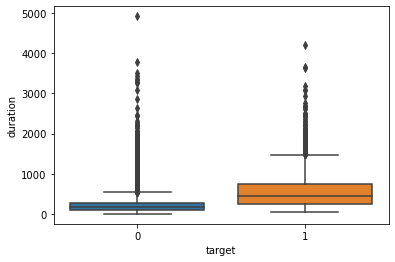

In [35]:
sns.boxplot(data=bank_data, x="target", y="duration")
plt.show()

The duration of a customer can be a useful predictor because it is already mentioned in the data that this field highely affects the target variable and should only be used for benchmark purposes. 

## Age

In [36]:
bank_data['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

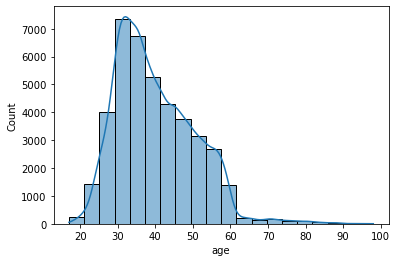

In [37]:
sns.histplot(data=bank_data, x=bank_data['age'], kde=True, bins=20)
plt.show()

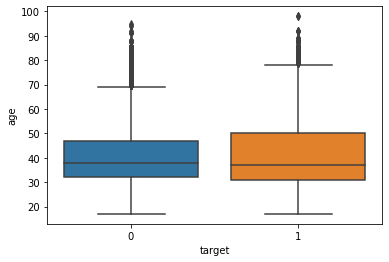

In [38]:
sns.boxplot(data=bank_data, x="target", y="age")
plt.show()

The histogram is roughly bell-shaped, with the peak at around 30-40 years old. The median age is around 38-40.

The boxplot for both the classes overlaps, indicating that age is not necessarily a good indicator for which customer will subscribe and which customer will not.

## Campaign

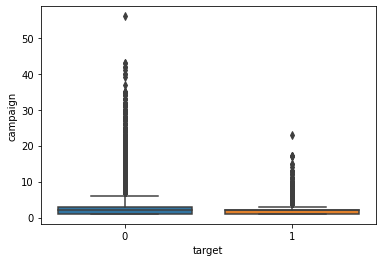

In [39]:
sns.boxplot(data=bank_data, x="target", y="campaign")
plt.show()

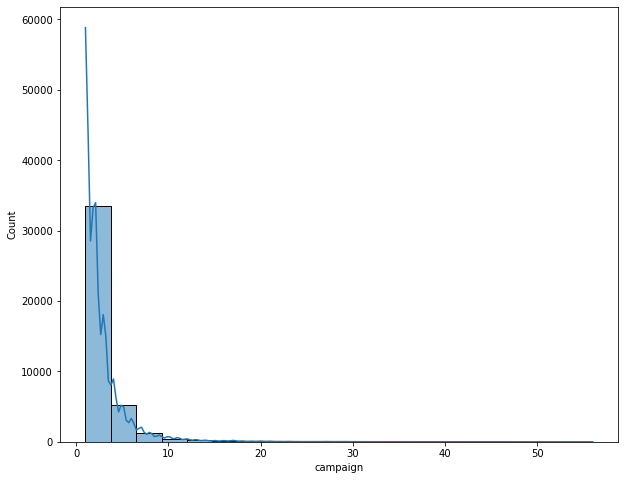

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["campaign"], bins=20, kde=True)
plt.show()

## Employment Variation Rate

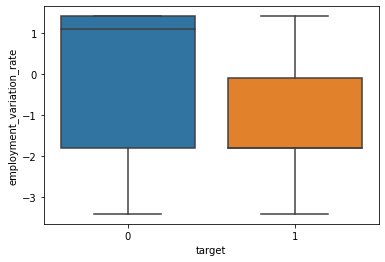

In [41]:
sns.boxplot(data=bank_data, x="target", y="employment_variation_rate")
plt.show()

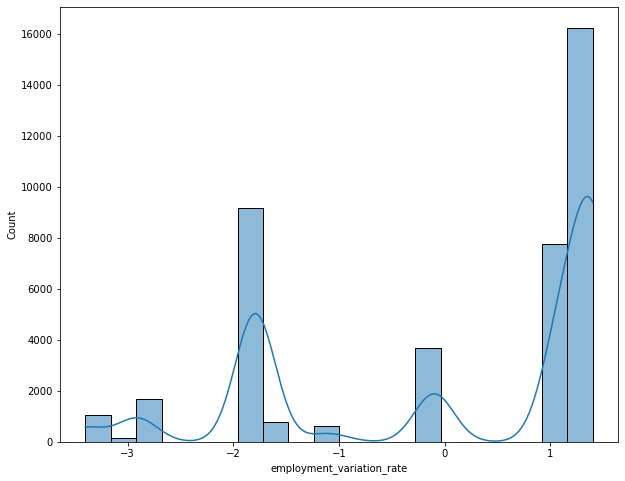

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["employment_variation_rate"], bins=20, kde=True)
plt.show()

## Consumer Price Index

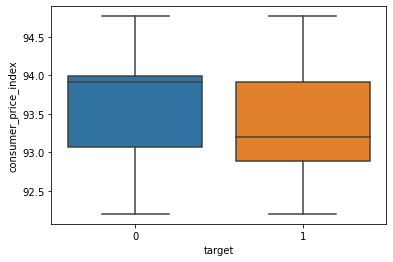

In [43]:
sns.boxplot(data=bank_data, x="target", y="consumer_price_index")
plt.show()

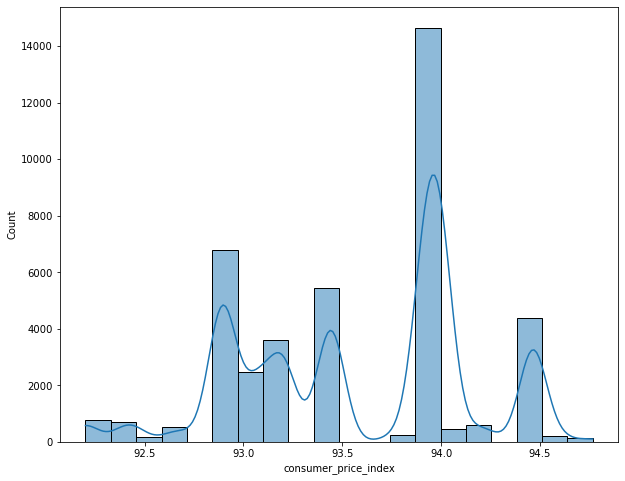

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["consumer_price_index"], bins=20, kde=True)
plt.show()

## Consumer Confidence Index

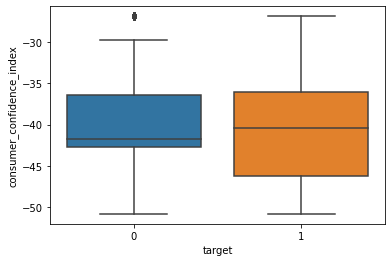

In [45]:
sns.boxplot(data=bank_data, x="target", y="consumer_confidence_index")
plt.show()

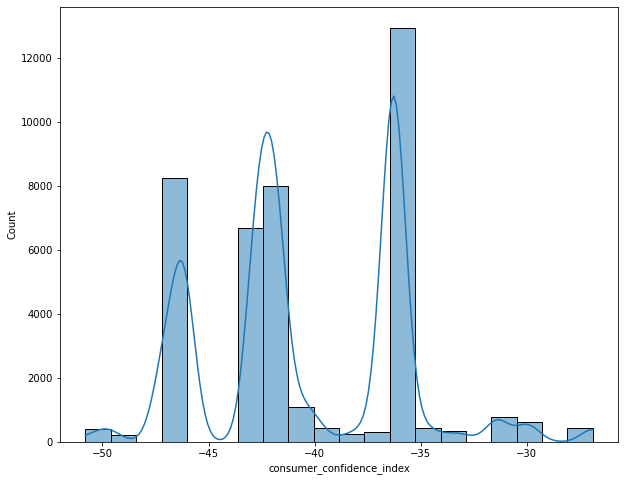

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["consumer_confidence_index"], bins=20, kde=True)
plt.show()

## Euribor 3 Month Rate [ Euro Interbank Offered Rate ]

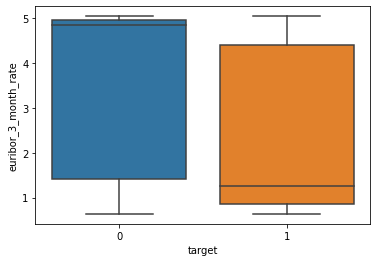

In [47]:
sns.boxplot(data=bank_data, x="target", y="euribor_3_month_rate")
plt.show()

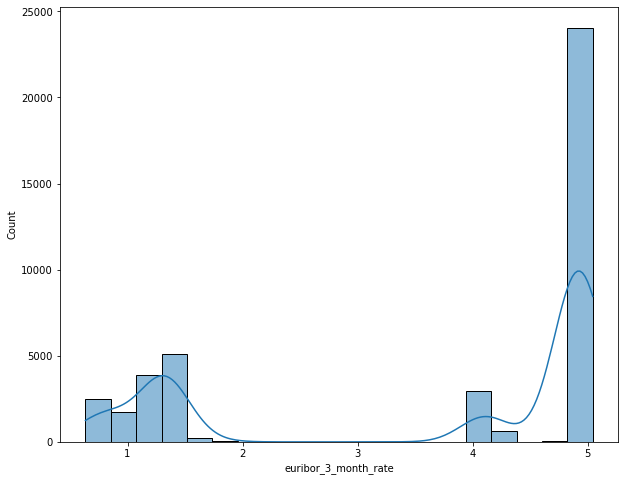

In [48]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["euribor_3_month_rate"], bins=20, kde=True)
plt.show()

## Number Of Employees

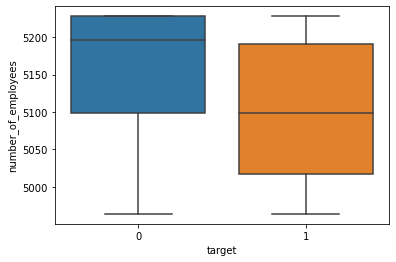

In [49]:
sns.boxplot(data=bank_data, x="target", y="number_of_employees")
plt.show()

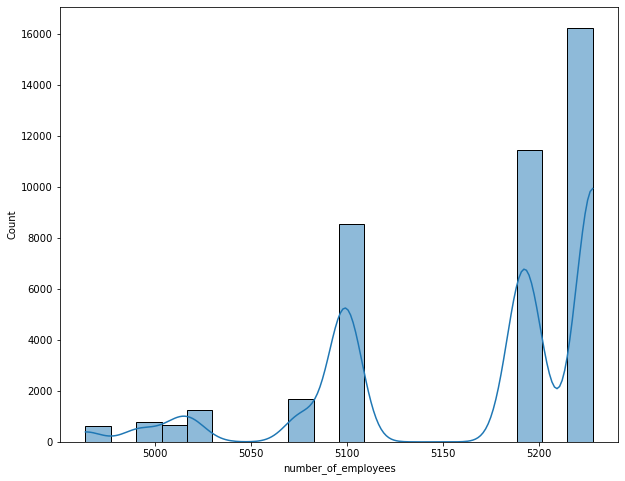

In [50]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["number_of_employees"], bins=20, kde=True)
plt.show()

## Previous - number of contacts performed before this campaign and for this client

In [51]:
bank_data["previous"].value_counts()


0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

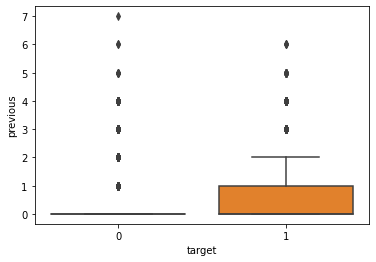

In [52]:
sns.boxplot(data=data, x="target", y="previous")
plt.show()

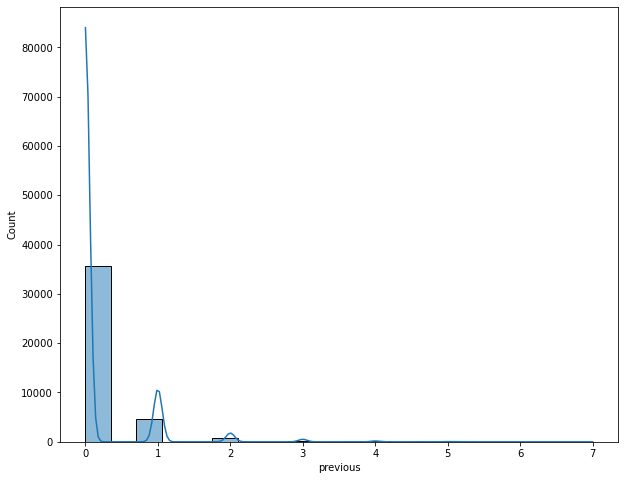

In [53]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["previous"], bins=20, kde=True)
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

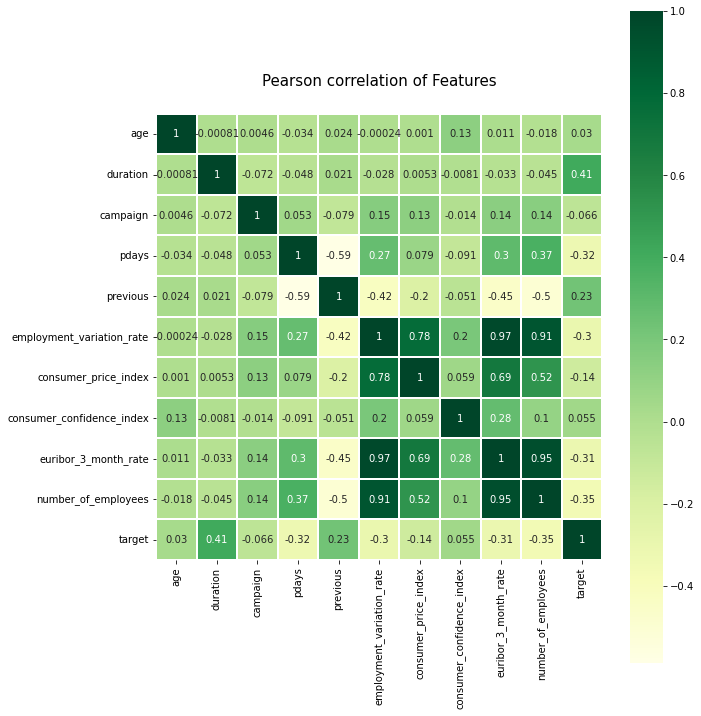

In [54]:
corr = bank_data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

There is high correlation between the number of employees and the Euro Interbank Offered Rate with a correlation values of 0.95. 

Euro Interbank Offered Rate and the employee variation rate has a correlation value of 0.97, which is very high compared to the other numerical features. 

In [55]:
bank_data.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target,is_new,education_mod
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_dropout
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_dropout
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,school_passout


In [56]:
bank_data.to_csv('bank_data_eda.csv', index=False)